In [1]:
from matplotlib import rc

rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 36})
rc('text', usetex=True)

import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import functools
import math
from scipy.linalg import qr

plt.rcParams.update({'font.size': 45})

n=200
mu = 0.001
diag = np.random.rand(n)
diag = diag*(1-mu) + mu
D = np.diag(diag)
D = np.diag(diag)

R = np.random.rand(n,n)

Q, _ = qr(R)

M = Q.dot(D).dot(Q.T)

def f(x):
    return x.T.dot(M).dot(x)/2.0
def L2(x):
    return np.sqrt(x.dot(x))

In [2]:
C = 1
h = 1/C
time = int(1000)
dpi=100
discrete_time = int(time*C)
eps = 0.0001

def L2(x):
    return np.linalg.norm(x)
    
t = np.linspace(0, time, time+1)

start= np.random.rand(n)

In [3]:
def Nesterov2(time=time, kmin=20):
    Nes = np.zeros((time+1,n))
    Nes[0] = start
    j = 1
    for k in range(time):
        if k==0:
            y = Nes[k]
        else:
            y = Nes[k] + (Nes[k]-Nes[k-1])* (j) / (j+3)
        Nes[k+1] = y -  M.dot(y)
        if np.dot(Nes[k+1]-2*Nes[k]+Nes[k-1], Nes[k]-Nes[k-1]) < 0 and j>= kmin:
            j=1
        else:
            j=j+1
    return Nes
Nes2 = Nesterov2()

In [4]:
def Nesterov3(time=time, kmin=20):
    Nes = np.zeros((time+1,n))
    Nes[0] = start
    j = 1
    for k in range(time):
        if k==0:
            y = Nes[k]
        else:
            y = Nes[k] + (Nes[k]-Nes[k-1])* (j) / (j+3)
        Nes[k+1] = y -  M.dot(y)
        if L2(Nes[k+1]-Nes[k]) < L2(Nes[k]-Nes[k-1])  and j>= kmin:
            j=1
        else:
            j=j+1
    return Nes
Nes3 = Nesterov3()

In [5]:
Nes2 = Nesterov2(time)
Nes3 = Nesterov3(time)
Nes2_func = np.apply_along_axis(f, 1, Nes2)
Nes3_func = np.apply_along_axis(f, 1, Nes3)

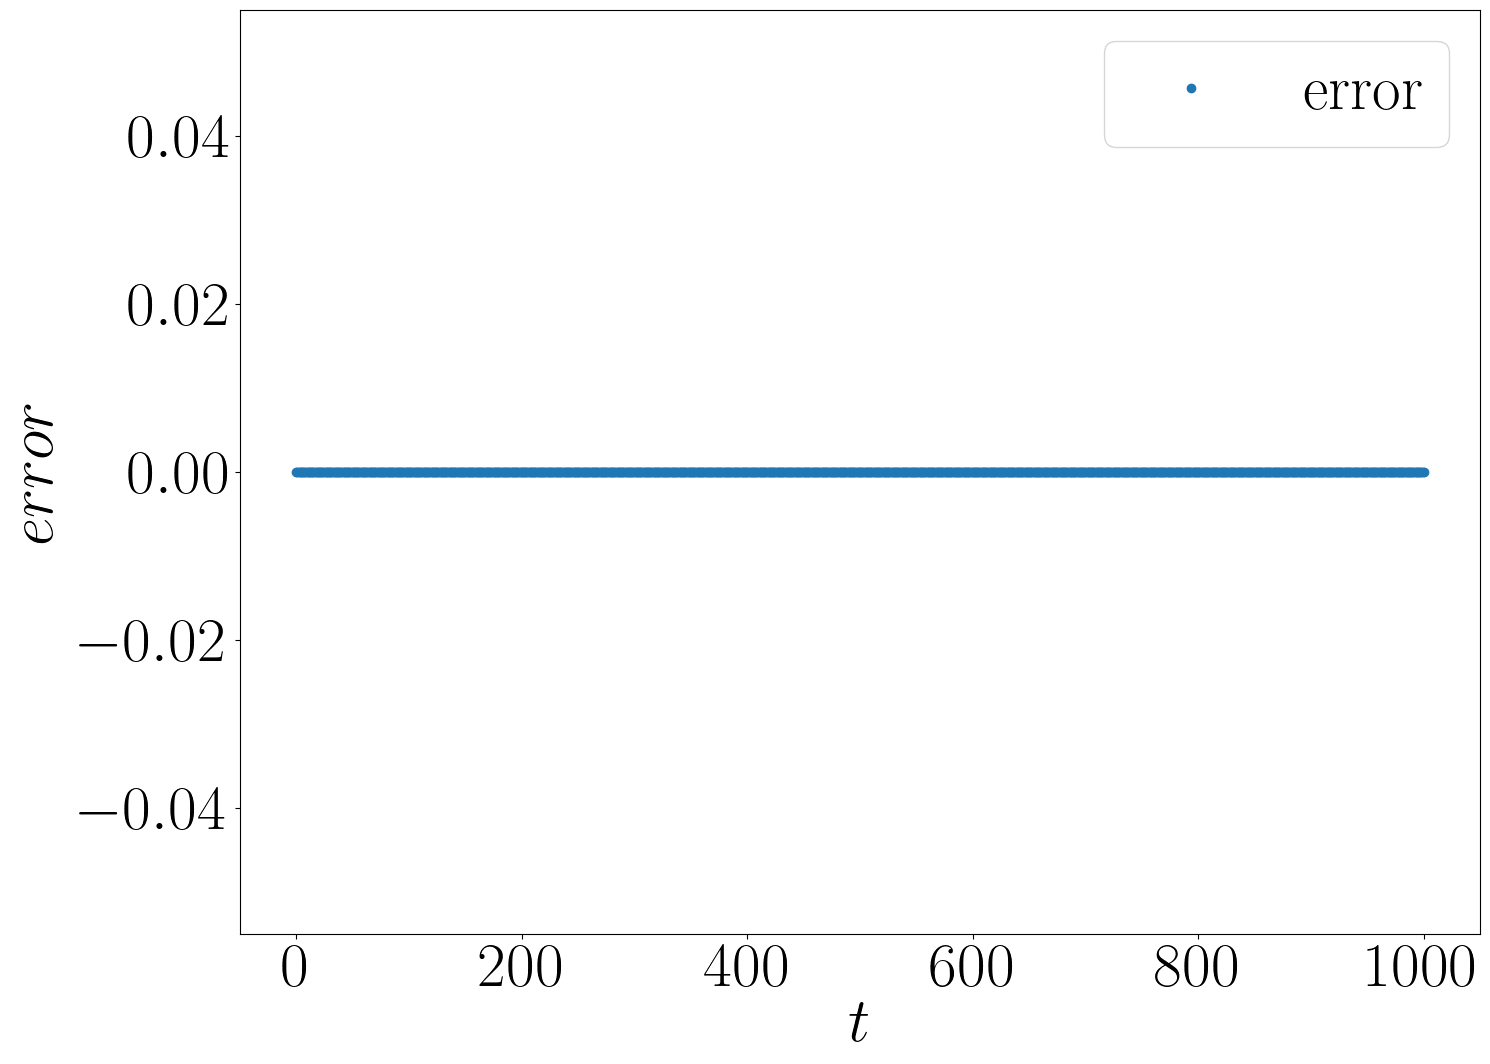

In [6]:
plt.figure(figsize=(16,12))
plt.plot(t, Nes2_func-Nes3_func, '.', label="error", markersize=12)
plt.xlabel('$t$', labelpad=0)
plt.ylabel('$error$', labelpad=10)
plt.legend()
plt.show()